<h1>Análizando algoritmos de ordenamiento</h1>

In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [ ]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [ ]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [59]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [60]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [52]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [ ]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [ ]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [ ]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

<h4> Análisis del tiempo de ejecución</h4>

In [53]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [54]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 98


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [55]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [37]:
print exper_analysis(10)

[2, 2, 8, 20, 29, 41, 47, 62, 77, 125]


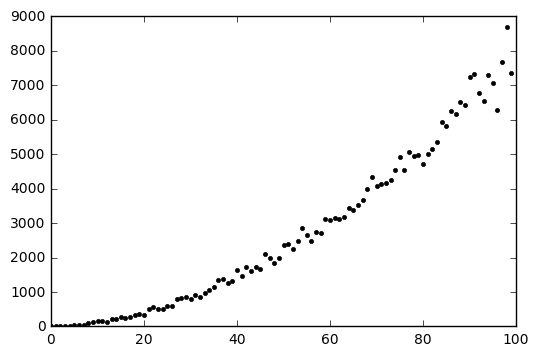

In [38]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

# Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

In [ ]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time

# Punto 1

In [61]:
import random as rnd
import time
def exper_analysis_insertion(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()
        right_insertion_sort(l)
        toc = time.clock()
        results.append((toc-tic)*1e6)
    return results

In [62]:
def exper_teorico(n):
    results = []
    for i in range(n):
        results.append(i*i)
    return results

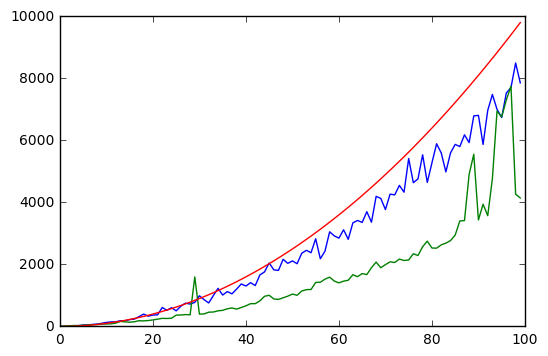

In [64]:
pl.clf()
x = np.arange(100)
yt = np.array(exper_analysis_insertion(100)) #tiempo de ejecución
yTeo = np.array(exper_teorico(100)) # Tiempo teorico O(n^2)
y = np.array(exper_analysis(100)) #Número de Operaciones

pl.plot(x, y , x, yt, x,yTeo)
pl.show()

# Punto 2

# Invariante

Invariante Para el Merge, el algoritmo debe verificar para los arreglos que en cada nivel del arbol los arreglos se encuentran ordenados, es decir que el elemento de la izquierda es siempre menor al de la derecha y así mismo es mayor al de su izquierda para todo elemento a partir de i=1.

In [34]:
def invarianteMerge(arr, pos):

        if pos < len(arr):
            while pos < len(arr) - 1:
                if arr[pos] < arr[pos + 1]:
                    pos = pos + 1
                else:
                    return False
        return True

In [67]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def mergeSort(arreglo, acct):
    if len(arreglo)>1:
        mid = len(arreglo)//2; acct.count()
        izq = arreglo[:mid]; acct.count()
        der = arreglo[mid:]; acct.count()
        mergeSort(izq, acct)
        mergeSort(der, acct)
        a=0;i=0;j=0
        while i < len(izq) and j < len(der):
           
            
            if izq[i] < der[j]:
                arreglo[a]=izq[i]; acct.count()
                i = i + 1; acct.count()
            else:
                arreglo[a]=der[j]
                j = j + 1; acct.count()
                a = a + 1; acct.count()

        while i < len(izq):
            acct.count()
            arreglo[a]=izq[i]; acct.count()
            i = i + 1; acct.count()
            a = a + 1; acct.count()

        while j < len(der):
            acct.count()
            arreglo[a]= der[j]; acct.count()
            j = j + 1; acct.count()
            a = a + 1; acct.count()
            
            

In [68]:
B = np.random.permutation(range(0,10))
c  = [32,25,85,17,98,74,8]
acct = Counter()
mergeSort(B, acct)
acct.print_steps()
print B

Number of steps = 127
[2 2 2 2 2 2 2 2 2 2]


In [69]:
import random as rnd

def exper_analysis_merge(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        mergeSort(l, acct)
        results.append(acct.steps)
    return results

In [70]:
print exper_analysis_merge(15)

[0, 0, 9, 20, 33, 48, 65, 78, 91, 104, 125, 138, 163, 172, 189]


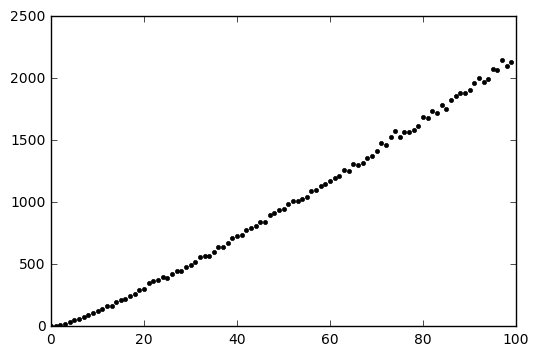

In [87]:
import random as rn
import time 

def timeAnalysis2(n):
        times = []
        acct = Counter()
        for i in range(n):
            l=range(i)
            rn.shuffle(l)
            tic = time.clock()#get start time
            mergeSort(l,acct)
            toc = time.clock()#get final time
            times.append((toc-tic)*1000000)
        return times

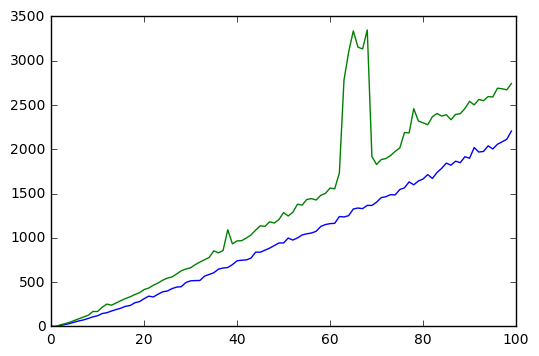

In [88]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis_merge(100))
y2 = np.array(timeAnalysis2(100))
pl.plot(x, y, x , y2)

# Punto 3

# Invariante

<h4>Invariante para quick sort donde el pivote es siempre menor al ultimo elemento, donde primero es pr y ultimo pt</h4>

In [26]:
def invariantQS(arr, pivote):
    i = 0; j = pivote + 1
    if j < len(arr):
        while j < len(arr):
            if arr[pivote] < arr[j]:
                j = j + 1
        else: 
              return false
    else: 
        if pivote != 0:
            while i>0:
                if arr[pivote] > arr[i]:
                    i = i + 1
                else: 
                    return false
    return true

In [97]:
def quickSort(arr):
    quickSortH(arr,0,len(arr)-1)

def quickSort_aux(arr,pr,ut):  
    if pr < ut:
        
        hecho = False
        pivote = arr[pr]
        somb_izq = pr + 1
        somb_der = ut
        
        while not hecho:
            acct.count()
            assert invarianteQS(arr,pivote)
            while somb_izq <= somb_der and arr[somb_izq] <= pivote:          
                   somb_izq = somb_izq + 1; 
            while arr[somb_der] >= pivote and somb_der >= somb_izq:
                
                somb_der = somb_der -1; 
            if somb_der < somb_izq:
                hecho = True; 
            else:
                temp = arr[somb_izq] 
                arr[somb_izq] = arr[somb_der] 
                arr[somb_der] = temp 
        temp = arr[pr] 
        arr[pr] = arr[somb_der] 
        arr[somb_der] = temp 

        splitpoint = somb_der; 
        quickSort_aux(arr,pr,splitpoint-1) 
        quickSort_aux(arr,splitpoint+1,ut)
        assert invarianteQS(arr,pivote)

In [98]:
a = [32,25,85,28,98,74,5]
quickSort(a)
print a

[5, 25, 28, 32, 74, 85, 98]


In [2]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def quickSort_acct(arr,acct):
   quickSort(arr,0,len(arr)-1,acct)

def quickSort(arr,pr,ut,acct):

    
    if pr < ut:
        pivote = arr[pr];acct.count()
        somb_izq = pr + 1; acct.count()
        somb_der = ut; acct.count()
        hecho = False
        while not hecho:
           while somb_izq <= somb_der and arr[somb_izq] <= pivote:
                   somb_izq = somb_izq + 1;acct.count()

           while arr[somb_der] >= pivote and somb_der >= somb_izq:
               somb_der = somb_der -1;acct.count()
           if somb_der < somb_izq:
               hecho = True;acct.count()
           else:
               temp = arr[somb_izq];acct.count()
               arr[somb_izq] = arr[somb_der];acct.count()
               arr[somb_der] = temp;acct.count()
        temp = arr[pr];acct.count()
        arr[pr] = arr[somb_der];acct.count()
        arr[somb_der] = temp;acct.count()

        splitpoint = somb_der;acct.count()
        quickSort(arr,pr,splitpoint-1,acct);acct.count()
        quickSort(arr,splitpoint+1,ut,acct);acct.count()
   

In [3]:
import random as rnd

def exper_analysis_quick(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        quickSort_acct(l,acct)
        results.append(acct.steps)
    return results

In [4]:
print exper_analysis_quick(10)

[0, 0, 11, 12, 24, 38, 44, 60, 74, 102]


In [5]:
B = np.random.permutation(range(0,10))
acct = Counter()
quickSort_acct(B, acct)
acct.print_steps()

Number of steps = 98


In [90]:
import random as rn
import time 

def timeAnalysis(n):
        times = []
        acct = Counter()
        for i in range(n):
            l=range(i)
            rn.shuffle(l)
            tic = time.clock()#get start time
            quickSort_acct(l,acct)
            toc = time.clock()#get final time
            times.append((toc-tic)*1000000)
        return times

In [91]:
print timeAnalysis(10);

[5.987132681184448, 2.1382616068876814, 23.948531179485144, 31.218621188600082, 33.78453493496636, 47.041757625265745, 67.14141818520147, 63.72019879563595, 129.15100751342834, 97.50473418534966]


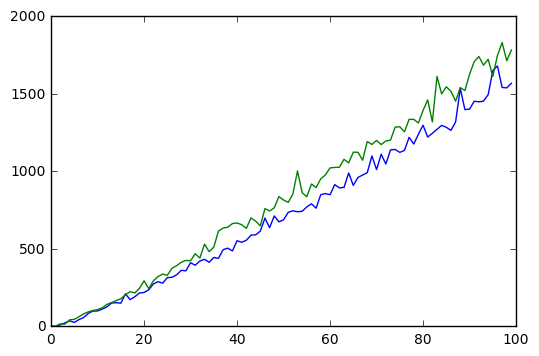

In [92]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis_quick(100))
y4 = np.array(timeAnalysis(100))
pl.plot(x, y, x, y4)

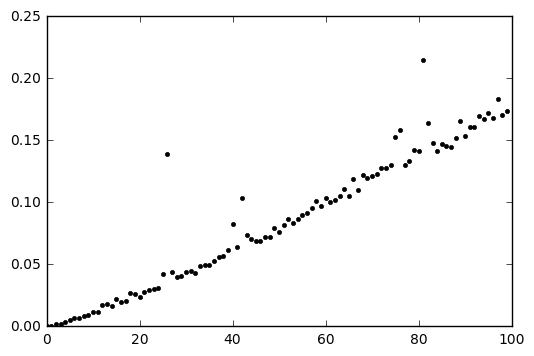

In [9]:
pl.clf()
x = np.arange(100)
y = np.array(timeAnalysis(100))
pl.plot(x, y, 'k.')